In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
np.random.seed(42)
train, test = train_test_split(data, train_size=0.7)

# EDA

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,499.000000,623.000000,623.000000,623.000000
mean,446.581059,0.370787,2.341894,29.256353,0.576244,0.386838,31.840730
std,260.012799,0.483404,0.819945,14.558567,1.216267,0.807692,51.027372
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,216.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,454.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,675.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.750000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 445 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          499 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        139 non-null    object 
 11  Embarked     622 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          484
Embarked         1
dtype: int64

C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

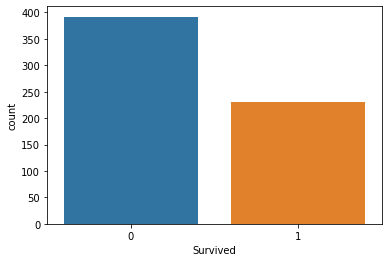

In [7]:
sns.countplot(train["Survived"])

In [8]:
len(train[train.Survived==0]) / len(train)

0.6292134831460674

# Pclass

In [9]:
train[["Pclass","Survived"]].groupby('Pclass').mean()

,Survived
Pclass,
1,0.597122
2,0.477273
3,0.241477


C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

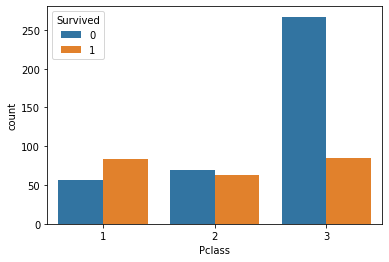

In [10]:
sns.countplot(train["Pclass"], hue=train["Survived"])

# Sex

In [11]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.727700
male,0.185366


C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

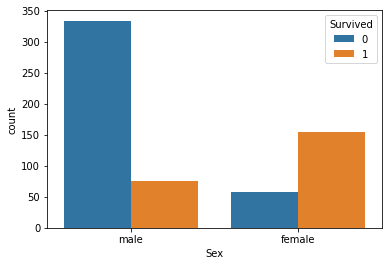

In [12]:
sns.countplot(train["Sex"], hue=train["Survived"])

In [13]:
# Change Male->1, Female->0
train['Sex_Code'] = train['Sex'].map({'female' : 0, 'male' : 1}).astype('int')

<ipython-input-13-359e34ddd1a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex_Code'] = train['Sex'].map({'female' : 0, 'male' : 1}).astype('int')


In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,1
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,0
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,1
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,0
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,1
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,1
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,0


# Fare

In [15]:
train['Fare_3'] = pd.qcut(train['Fare'], 3)
train['Fare_4'] = pd.qcut(train['Fare'], 4)
train['Fare_5'] = pd.qcut(train['Fare'], 5)
train['Fare_6'] = pd.qcut(train['Fare'], 6)

<ipython-input-15-838e2d5d9195>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare_3'] = pd.qcut(train['Fare'], 3)
<ipython-input-15-838e2d5d9195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare_4'] = pd.qcut(train['Fare'], 4)
<ipython-input-15-838e2d5d9195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [16]:
# labelEncoder
label = LabelEncoder()
train['Fare_3'] = label.fit_transform(train['Fare_3'])
train['Fare_4'] = label.fit_transform(train['Fare_4'])
train['Fare_5'] = label.fit_transform(train['Fare_5'])
train['Fare_6'] = label.fit_transform(train['Fare_6'])

<ipython-input-16-b7d15bf8177e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare_3'] = label.fit_transform(train['Fare_3'])
<ipython-input-16-b7d15bf8177e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare_4'] = label.fit_transform(train['Fare_4'])
<ipython-input-16-b7d15bf8177e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

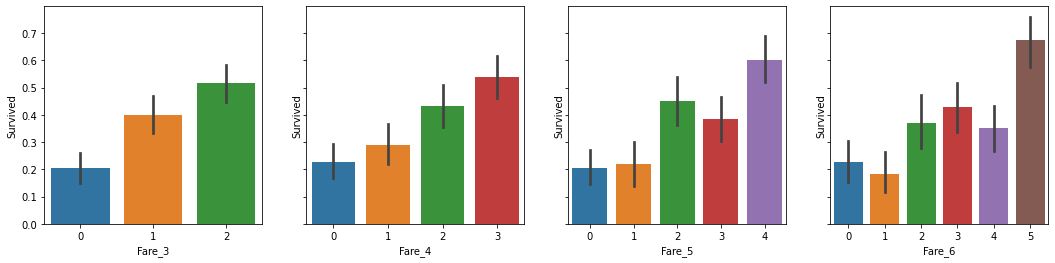

In [17]:
# plots
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(18)
g1 = sns.barplot(x='Fare_3', y="Survived", data=train, ax=ax1)
g2 = sns.barplot(x='Fare_4', y="Survived", data=train, ax=ax2)
g3 = sns.barplot(x='Fare_5', y="Survived", data=train, ax=ax3)
g4 = sns.barplot(x='Fare_6', y="Survived", data=train, ax=ax4)

In [18]:
# compare
X = train.drop(labels=['Survived','PassengerId'], axis=1)
Y = train['Survived']

b3, b4, b5, b6 = ['Sex_Code', 'Pclass', 'Fare_3'], ['Sex_Code', 'Pclass', 'Fare_4'], ['Sex_Code', 'Pclass', 'Fare_5'],\
['Sex_Code', 'Pclass', 'Fare_6']
b3_Model = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
b3_Model.fit(X[b3], Y)
b4_Model = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
b4_Model.fit(X[b4], Y)
b5_Model = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
b5_Model.fit(X[b5], Y)
b6_Model = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
b6_Model.fit(X[b6], Y)
print('b3 oob score: %.5f' %(b3_Model.oob_score_))
print('b4 oob score: %.5f' %(b4_Model.oob_score_))
print('b5 oob score: %.5f' %(b5_Model.oob_score_))
print('b6 oob score: %.5f' %(b6_Model.oob_score_))

b3 oob score: 0.77207
b4 oob score: 0.81220
b5 oob score: 0.82343 
b6 oob score: 0.81059


In [19]:
pd.crosstab(train['Fare_5'], train['Pclass'])

Pclass,1,2,3
Fare_5,,,
0,4,5,143
1,0,16,84
2,0,58,66
3,37,45,40
4,98,8,19


In [20]:
def clean_fare(data):
    data['Fare_5'] = pd.qcut(data['Fare'], 5)
    label = LabelEncoder()
    data['Fare_5'] = label.fit_transform(data['Fare_5'])
    return data

# Family Members

In [21]:
# cut into 3 class
def family_size(data):
    data['Family_size'] = data['SibSp'] + data['Parch'] + 1
    data.loc[data['Family_size'] == 1, 'Family_class'] = 0
    data.loc[(data['Family_size'] <= 4) & (data['Family_size'] > 1), 'Family_class'] = 1
    data.loc[data['Family_size'] >= 5, 'Family_class'] = 2
    data['Family_class'] = data['Family_class'].astype(int)
    return data

In [22]:
train = family_size(train)

<ipython-input-21-661204218960>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family_size'] = data['SibSp'] + data['Parch'] + 1
C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [23]:
train[['Family_class','Survived']].groupby('Family_class').mean()

,Survived
Family_class,
0,0.298387
1,0.551220
2,0.152174


# Name

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_class,Title,title_First,title_Miss,title_Mr,title_Mrs,title_Second,embarked_C,embarked_Q,embarked_S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,...,1,Second,0,0,0,0,1,0,0,1
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,...,0,Mr,0,0,1,0,0,0,0,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,...,1,Miss,0,1,0,0,0,0,0,1
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,...,1,Mr,0,0,1,0,0,0,0,1
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,...,1,Mr,0,0,1,0,0,0,0,1


In [24]:
train['Title'] = train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

<ipython-input-24-7b8a963327d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())


In [25]:
train.Title.describe()

count     623
unique     13
top        Mr
freq      368
Name: Title, dtype: object

In [26]:
train[["Title","Survived"]].groupby(['Title']).mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Dr,0.250000
Lady,1.000000
Master,0.548387
Miss,0.664000
Mlle,1.000000
Mme,1.000000
Mr,0.154891


C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title', ylabel='count'>

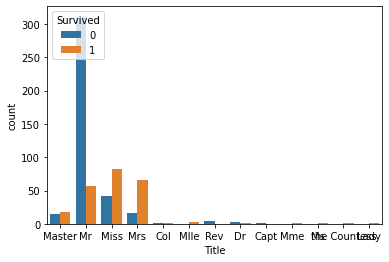

In [27]:
sns.countplot(train["Title"], hue=train["Survived"])

In [28]:
train['Title'] = train['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
train['Title'] = train['Title'].replace(['Lady', 'the Countess'], 'Mrs')
train['Title'] = train['Title'].replace(['Don', 'Dr', 'Jonkheer', 'Rev', 'Capt', 'Sir'], 'First')
train['Title'] = train['Title'].replace(['Col', 'Major', 'Master'], 'Second')

<ipython-input-28-61d03f6ed705>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train['Title'].replace(['Mlle', 'Ms','Mme'], 'Miss')
<ipython-input-28-61d03f6ed705>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train['Title'].replace(['Lady', 'the Countess'], 'Mrs')
<ipython-input-28-61d03f6ed705>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title', ylabel='count'>

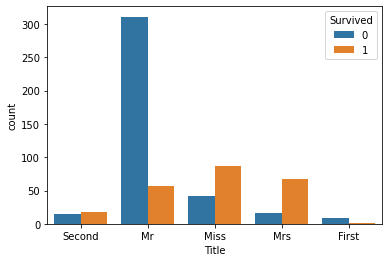

In [29]:
sns.countplot(train["Title"], hue=train["Survived"])

In [30]:
# label encoding vs. one-hot encoding
# https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87

In [31]:
# one-hot encoding
title_ohe = pd.get_dummies(train.Title, prefix='title')
train = pd.concat([train, title_ohe], axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_5,Fare_6,Family_size,Family_class,Title,title_First,title_Miss,title_Mr,title_Mrs,title_Second
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,...,4,5,3,1,Second,0,0,0,0,1
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,...,0,1,1,0,Mr,0,0,1,0,0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,...,2,2,3,1,Miss,0,1,0,0,0
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,...,3,4,4,1,Mr,0,0,1,0,0
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,...,3,4,3,1,Mr,0,0,1,0,0


In [33]:
def clean_title(data):
    data['Title'] = data.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
    data['Title'] = data['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
    data['Title'] = data['Title'].replace(['Lady', 'the Countess'], 'Mrs')
    data['Title'] = data['Title'].replace(['Don', 'Dr', 'Jonkheer', 'Rev', 'Capt', 'Sir'], 'First')
    data['Title'] = data['Title'].replace(['Col', 'Major', 'Master'], 'Second')
    title_ohe = pd.get_dummies(data.Title, prefix='title')
    data = pd.concat([data, title_ohe], axis=1)
    return data

# Embarked

In [34]:
train[["Embarked","Survived"]].groupby('Embarked').mean()

,Survived
Embarked,
C,0.563636
Q,0.381818
S,0.321663


C:\Users\Java\anaconda3\envs\opencv_course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

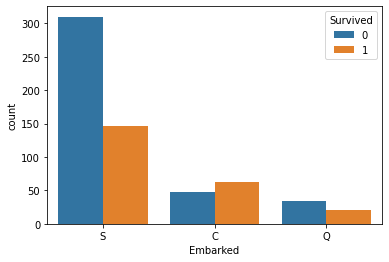

In [35]:
sns.countplot(train["Embarked"], hue=train["Survived"])

In [36]:
# fill the two NaN with the highest % of embarked
train.loc[train.Embarked.isnull(), 'Embarked'] = 'S'

In [37]:
# one-hot encoding
def embarked(data):
    embarked_ohe = pd.get_dummies(data.Embarked, prefix='embarked')
    data = pd.concat([data, embarked_ohe], axis=1)
    return data

In [38]:
train = embarked(train)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_class,Title,title_First,title_Miss,title_Mr,title_Mrs,title_Second,embarked_C,embarked_Q,embarked_S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,...,1,Second,0,0,0,0,1,0,0,1
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,...,0,Mr,0,0,1,0,0,0,0,1
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,...,1,Miss,0,1,0,0,0,0,0,1
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,...,1,Mr,0,0,1,0,0,0,0,1
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,...,1,Mr,0,0,1,0,0,0,0,1


# Model

In [40]:
# model
base = ['Pclass', 'Sex_Code', 'Fare_5', 'Family_class', 'title_First', 'title_Miss', 'title_Mr', 'title_Mrs', 
        'title_Second', 'embarked_C', 'embarked_Q', 'embarked_S']
X = train[base]
y = train['Survived']

In [41]:
X.head()

,Pclass,Sex_Code,Fare_5,Family_class,title_First,title_Miss,title_Mr,title_Mrs,title_Second,embarked_C,embarked_Q,embarked_S
445,1,1,4,1,0,0,0,0,1,0,0,1
650,3,1,0,0,0,0,1,0,0,0,0,1
172,3,0,2,1,0,1,0,0,0,0,0,1
450,2,1,3,1,0,0,1,0,0,0,0,1
314,2,1,3,1,0,0,1,0,0,0,0,1


In [42]:
rf = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
rf.fit(X, y)

RandomForestClassifier(min_samples_split=20, n_estimators=250, oob_score=True,
                       random_state=2)

In [51]:
base

['Pclass',
 'Sex_Code',
 'Fare_5',
 'Family_class',
 'title_First',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Second',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

In [47]:
rf.feature_importances_

array([0.13068824, 0.21689227, 0.10079976, 0.08181643, 0.01517506,
       0.06288131, 0.2268796 , 0.08134755, 0.02599907, 0.02395879,
       0.00963054, 0.02393138])

# Validation

In [43]:
# clean test data
test['Sex_Code'] = test['Sex'].map({'female' : 0, 'male' : 1}).astype('int')
test = clean_fare(test)
test = family_size(test)
test = clean_title(test)
test = embarked(test)

<ipython-input-43-e05a08f4906e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex_Code'] = test['Sex'].map({'female' : 0, 'male' : 1}).astype('int')
<ipython-input-20-5725a32c46d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_5'] = pd.qcut(data['Fare'], 5)
<ipython-input-20-5725a32c46d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [44]:
X_valid = test[base]
pred = rf.predict(X_valid)
pred = pd.DataFrame(pred, columns=['pred'])

In [45]:
test = test.reset_index()
test = pd.concat([test, pred], axis=1)

In [46]:
len(test[test.Survived == test.pred]) / len(test)

0.8208955223880597